# Binary Tree Visualizer

Given a postorder and preorder sequence of a binary tree, construct and visualize it

The binary tree can be unbalanced

In [2]:
from graphviz import Digraph

In [3]:
# Python3 program for construction of
# full binary tree

# A binary tree node has val, pointer
# to left child and a pointer to right child
class Node:
	
	def __init__(self, val):
		
		self.val = val
		self.left = None
		self.right = None

# A recursive function to construct
# Full from pre[] and post[].
# preIndex is used to keep track
# of index in pre[]. l is low index
# and h is high index for the
# current subarray in post[]
def constructTreeUtil(pre: list, post: list,
						l: int, h: int,
					size: int) -> Node:
	global preIndex
	
	# Base case
	if (preIndex >= size or l > h):
		return None

	# The first node in preorder traversal
	# is root. So take the node at preIndex
	# from preorder and make it root, and
	# increment preIndex
	root = Node(pre[preIndex])
	preIndex += 1

	# If the current subarray has only
	# one element, no need to recur
	if (l == h or preIndex >= size):
		return root

	# Search the next element
	# of pre[] in post[]
	i = l
	while i <= h:
		if (pre[preIndex] == post[i]):
			break
		
		i += 1

	# Use the index of element
	# found in postorder to divide
	# postorder array in two parts.
	# Left subtree and right subtree
	if (i <= h):
		root.left = constructTreeUtil(pre, post,
									l, i, size)
		root.right = constructTreeUtil(pre, post,
									i + 1, h-1,
									size)

	return root

# The main function to construct
# Full Binary Tree from given
# preorder and postorder traversals.
# This function mainly uses constructTreeUtil()
def constructTree(pre: list,
				post: list,
				size: int) -> Node:
					
	global preIndex
	
	return constructTreeUtil(pre, post, 0,
							size - 1, size)

# A utility function to print
# inorder traversal of a Binary Tree
def printInorder(node: Node) -> None:

	if (node is None):
		return
	
	printInorder(node.left)
	print(node.val, end = " ")
	
	printInorder(node.right)


In [5]:
def visualize_tree(tree):
    def add_nodes_edges(tree, dot=None):
        # Create Digraph object
        if dot is None:
            dot = Digraph()
            dot.node(name=str(tree), label=str(tree.val))

        # Add nodes
        if tree.left:
            dot.node(name=str(tree.left) ,label=str(tree.left.val))
            dot.edge(str(tree), str(tree.left))
            dot = add_nodes_edges(tree.left, dot=dot)
            
        if tree.right:
            dot.node(name=str(tree.right) ,label=str(tree.right.val))
            dot.edge(str(tree), str(tree.right))
            dot = add_nodes_edges(tree.right, dot=dot)

        return dot
    
    # Add nodes recursively and create a list of edges
    dot = add_nodes_edges(tree)

    # Visualize the graph
    display(dot)
    
    return dot

Inorder traversal of the constructed tree: 
k c v t o j u q z i r d h g a s b p w e f x n y l m 

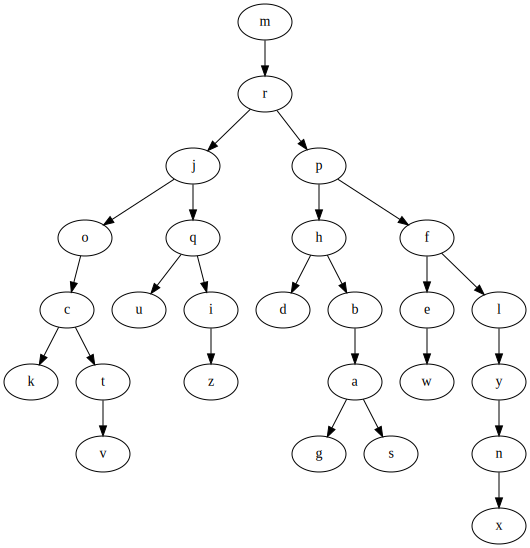

In [7]:
# Driver Code
pre = list('mrjocktvquizphdbagsfewlynx')
post = list('kvtcouziqjdgsabhwexnylfprm')
size = len(pre)

preIndex = 0

root = constructTree(pre, post, size)

print("Inorder traversal of "
    "the constructed tree: ")
    
printInorder(root)

dot = visualize_tree(root)